In [1]:
!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Incidents_Data.csv"
df = pd.read_csv(file_path)

<ipython-input-3-5b7405c906fb>:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [28]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79007 entries, 0 to 79006
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Report Number           79007 non-null  object 
 1   Local Case Number       79007 non-null  object 
 2   Agency Name             79007 non-null  object 
 3   ACRS Report Type        79007 non-null  object 
 4   Crash Date/Time         79007 non-null  object 
 5   Hit/Run                 79005 non-null  object 
 6   Route Type              78374 non-null  object 
 7   Lane Direction          79006 non-null  object 
 8   Lane Type               8833 non-null   object 
 9   Number of Lanes         79006 non-null  float64
 10  Direction               78995 non-null  object 
 11  Distance                78603 non-null  float64
 12  Distance Unit           79005 non-null  object 
 13  Road Grade              78407 non-null  object 
 14  Road Name               79005 non-null

In [27]:
# Display first few rows
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,...,Driver Substance Abuse,First Harmful Event,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP1123002M,190010046,Montgomery County Police,Injury Crash,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2.0,...,NONE DETECTED,OTHER VEHICLE,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.113113,-77.057592,"(39.11311333, -77.05759167)"
1,MCP21610009,16028039,Montgomery County Police,Property Damage Crash,06/04/2016 07:14:00 PM,Yes,County,East,NaN,1.0,...,UNKNOWN,PARKED VEHICLE,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",38.982443,-77.079235,"(38.98244333, -77.079235)"
2,MCP2790000P,15041420,MONTGOMERY,Property Damage Crash,08/18/2015 11:00:00 PM,No,County,South,NaN,2.0,...,NONE DETECTED,PARKED VEHICLE,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.189845,-77.230325,"(39.189845, -77.230325)"
3,MCP3378000J,230051006,Montgomery County Police,Injury Crash,08/24/2023 07:46:00 AM,No,Maryland (State),West,NaN,4.0,...,NONE DETECTED,NaN,NON INTERSECTION,NaN,CURVE LEFT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.041698,-77.050125,"(39.04169833, -77.050125)"
4,DD5659000H,230049130,Rockville Police Departme,Property Damage Crash,08/12/2023 04:28:00 PM,Yes,NaN,South,NaN,3.0,...,NaN,OTHER VEHICLE,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.084720,-77.148200,"(39.08472, -77.1482)"


In [29]:
# Summary statistics for numerical features

df.describe()

,Number of Lanes,Distance,Latitude,Longitude
count,79006.000000,78603.000000,79006.000000,79006.000000
mean,2.341215,62.776744,39.084363,-77.113810
std,1.161017,135.574812,0.072992,0.098535
min,0.000000,0.000000,37.720000,-79.486000
25%,2.000000,0.000000,39.024805,-77.190174
50%,2.000000,0.100000,39.075789,-77.106244
75%,3.000000,50.000000,39.140567,-77.040298
max,99.000000,1000.000000,39.988369,-75.527708


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Hit/Run                             2
Route Type                        633
Lane Direction                      1
Lane Type                       70174
Number of Lanes                     1
Direction                          12
Distance                          404
Distance Unit                       2
Road Grade                        600
Road Name                           2
Cross-Street Name                  12
Off-Road Description            79006
Municipality                    69268
Related Non-Motorist            75134
At Fault                            1
Collision Type                    311
Weather                          6146
Surface Condition                2175
Light                             604
Traffic Control                 10846
Driver Substance Abuse          12130
Non-Motorist Substance Abuse    75950
First Harmful Event               518
Second Harmful Event            58373
Junction                        12783
Intersection Type               3

In [8]:
df = df.drop(columns=['Off-Road Description', 'Municipality', 'Related Non-Motorist',
                      'Non-Motorist Substance Abuse', 'Second Harmful Event'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79007 entries, 0 to 79006
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Report Number           79007 non-null  object 
 1   Local Case Number       79007 non-null  object 
 2   Agency Name             79007 non-null  object 
 3   ACRS Report Type        79007 non-null  object 
 4   Crash Date/Time         79007 non-null  object 
 5   Hit/Run                 79005 non-null  object 
 6   Route Type              78374 non-null  object 
 7   Lane Direction          79006 non-null  object 
 8   Lane Type               8833 non-null   object 
 9   Number of Lanes         79006 non-null  float64
 10  Direction               78995 non-null  object 
 11  Distance                78603 non-null  float64
 12  Distance Unit           79005 non-null  object 
 13  Road Grade              78407 non-null  object 
 14  Road Name               79005 non-null

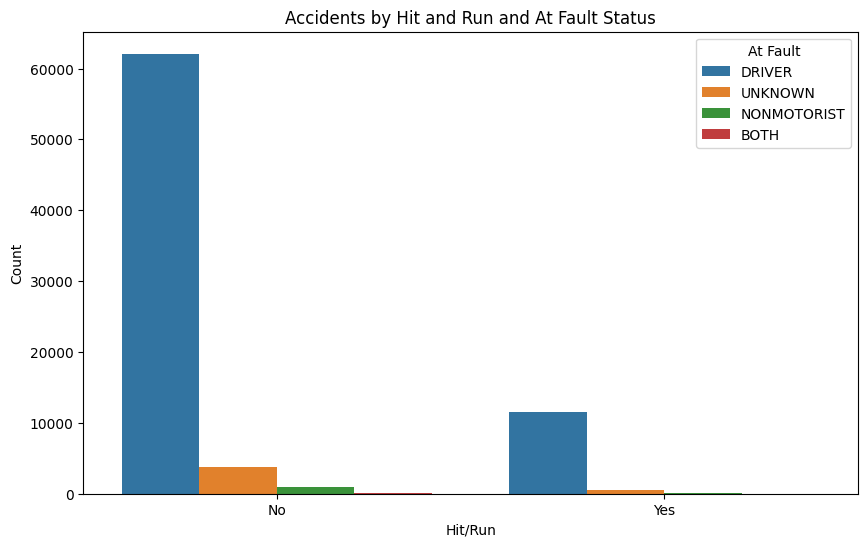

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hit/Run', hue='At Fault')
plt.title('Accidents by Hit and Run and At Fault Status')
plt.xlabel('Hit/Run')
plt.ylabel('Count')
plt.show()

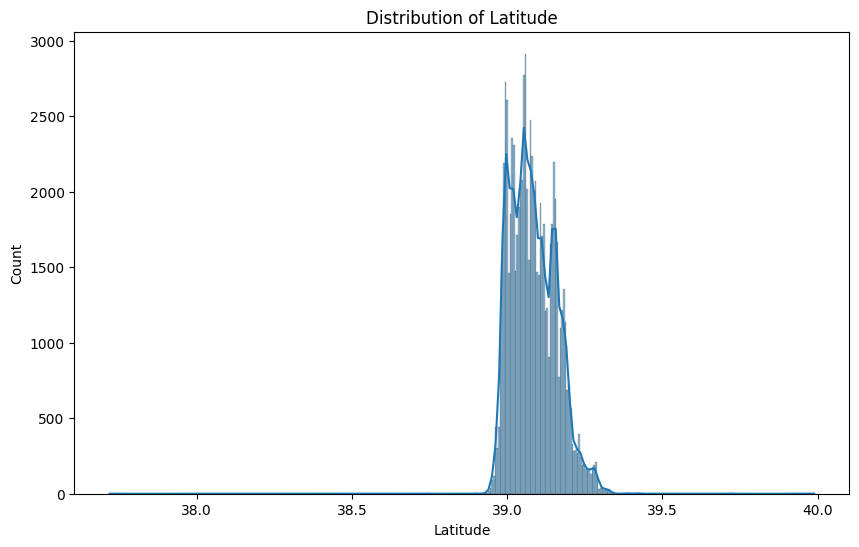

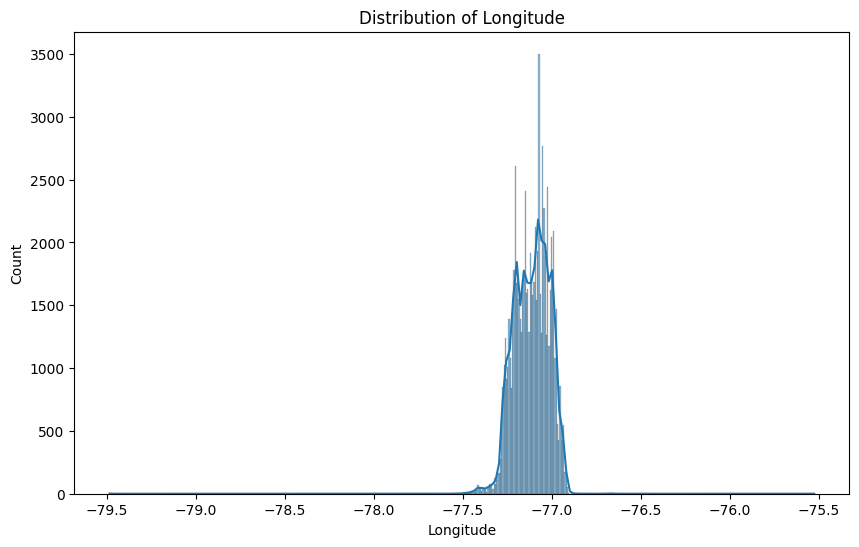

In [33]:
numeric_columns = ['Latitude', 'Longitude']

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

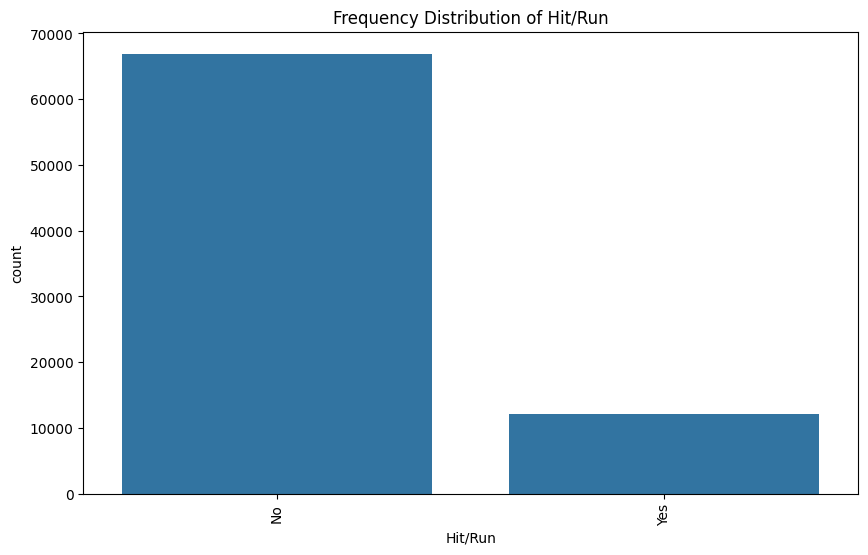

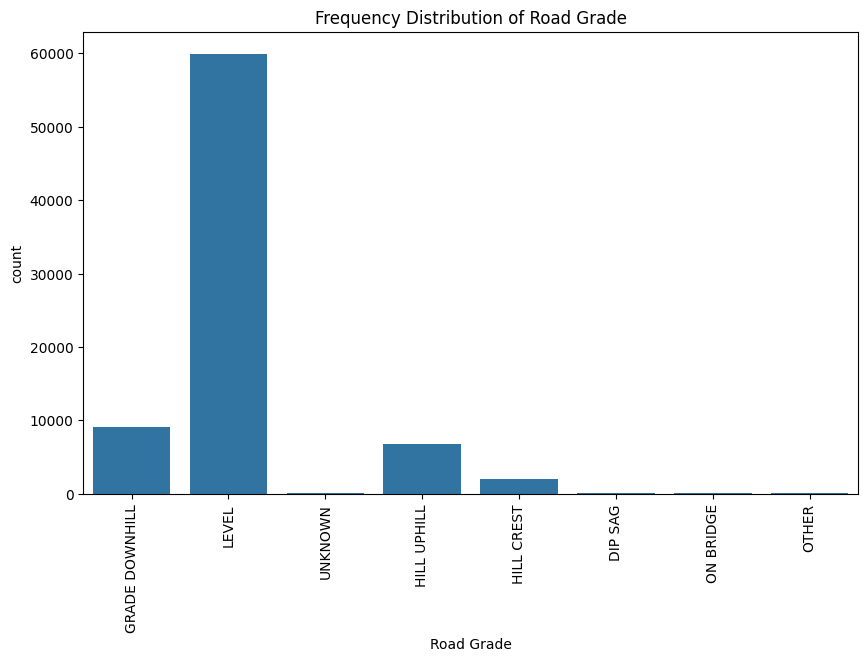

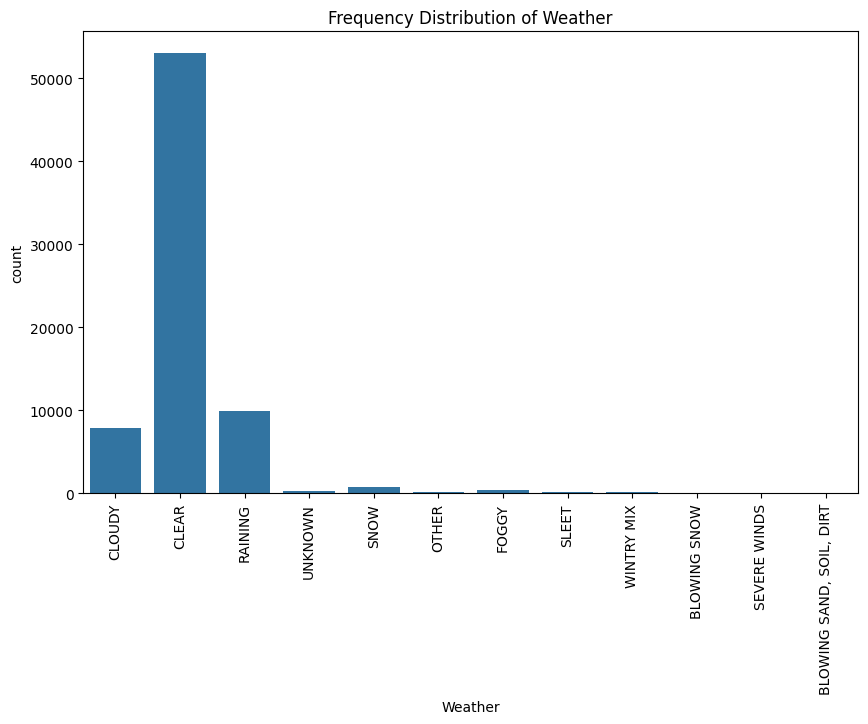

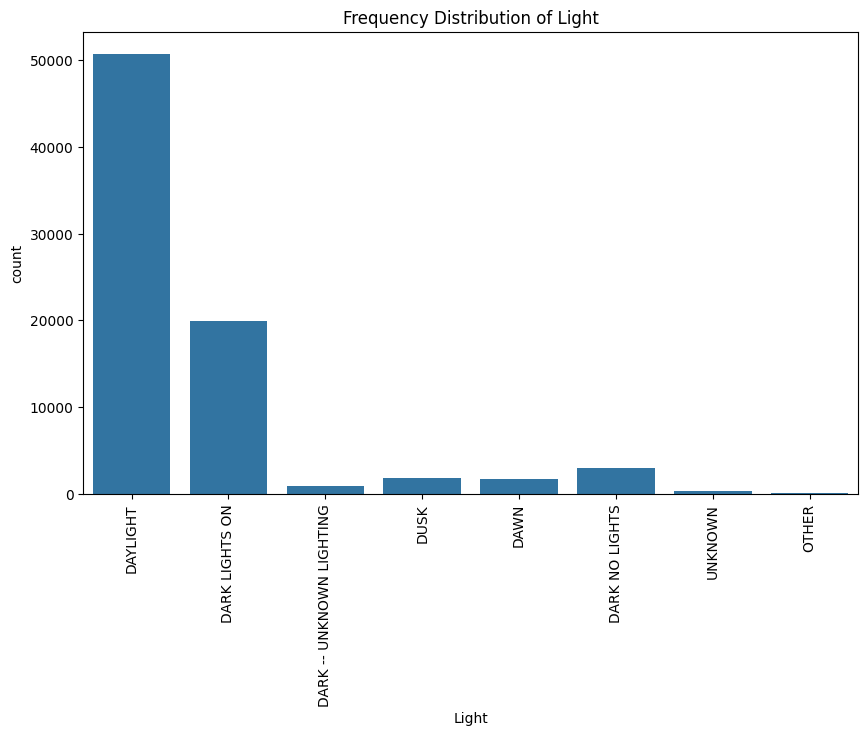

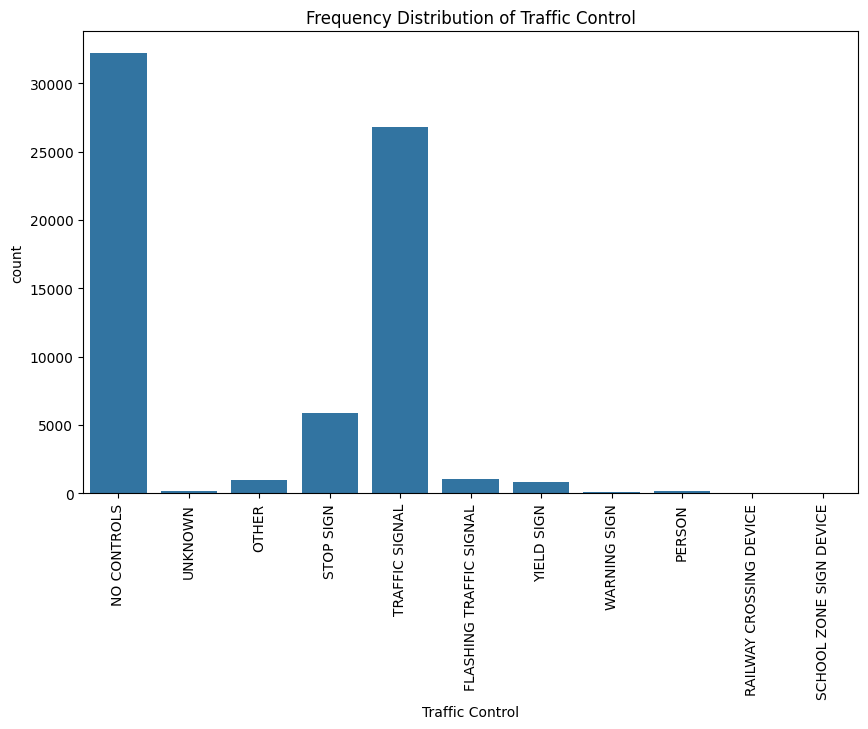

In [34]:
categorical_columns = ['Hit/Run', 'Road Grade', 'Weather', 'Light', 'Traffic Control']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

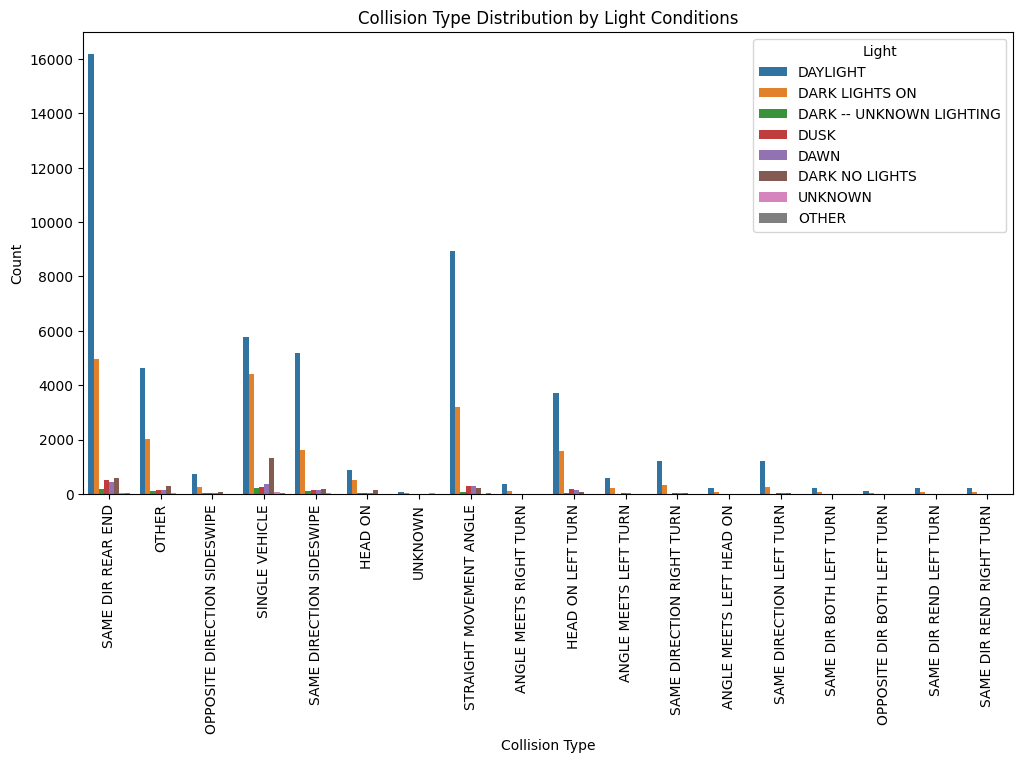

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Collision Type', hue='Light')
plt.title('Collision Type Distribution by Light Conditions')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [36]:
# Grouping data by Collision Type and Light, and then counting the occurrences
collision_light_counts = df.groupby(['Collision Type', 'Light']).size().reset_index(name='Count')

# Print the counts
print(collision_light_counts)

               Collision Type           Light  Count
0    ANGLE MEETS LEFT HEAD ON  DARK LIGHTS ON     55
1    ANGLE MEETS LEFT HEAD ON  DARK NO LIGHTS     10
2    ANGLE MEETS LEFT HEAD ON            DAWN      5
3    ANGLE MEETS LEFT HEAD ON        DAYLIGHT    224
4    ANGLE MEETS LEFT HEAD ON            DUSK      9
..                        ...             ...    ...
125                   UNKNOWN  DARK NO LIGHTS     10
126                   UNKNOWN            DAWN      4
127                   UNKNOWN        DAYLIGHT     88
128                   UNKNOWN            DUSK      1
129                   UNKNOWN         UNKNOWN     54

[130 rows x 3 columns]


In [37]:
# Grouping data by Collision Type and Light, and then counting the occurrences
collision_light_counts = df.groupby(['Collision Type', 'Weather']).size().reset_index(name='Count')

# Print the counts
print(collision_light_counts)

               Collision Type  Weather  Count
0    ANGLE MEETS LEFT HEAD ON    CLEAR    188
1    ANGLE MEETS LEFT HEAD ON   CLOUDY     39
2    ANGLE MEETS LEFT HEAD ON    OTHER      1
3    ANGLE MEETS LEFT HEAD ON  RAINING     43
4    ANGLE MEETS LEFT HEAD ON     SNOW      4
..                        ...      ...    ...
164                   UNKNOWN    CLEAR     96
165                   UNKNOWN   CLOUDY     13
166                   UNKNOWN  RAINING     14
167                   UNKNOWN     SNOW      1
168                   UNKNOWN  UNKNOWN     41

[169 rows x 3 columns]
